In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
# /media/juneyonglee/My Book/data/Chl-a/test/0/UST21_L3_Merged-Chla-1D_20210102_r5632_c2304.tiff
# /media/juneyonglee/My Book/Preprocessed/UST/Chl-a_8day/train/90/2012_01_20_sae.tiff
# img = input()
# img = cv2.imread(img,cv2.IMREAD_UNCHANGED)
# plt.imshow(img)
# plt.axis(False)
# plt.colorbar()


In [3]:
# np.sum(np.isnan(img))/(256**2)*100

/tmp/ipykernel_2404558/3198569825.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)  # 256개 색상 사용


현재 폴더: /media/juneyonglee/My Book/Preprocessed/UST/Chl-a_8day/train/perfect
2015_01_0_sae_r223_c28.tiff NaN 값 비율: 6.60%
2015_01_0_sae_r223_c28.tiff 0 값 비율: 0.00%


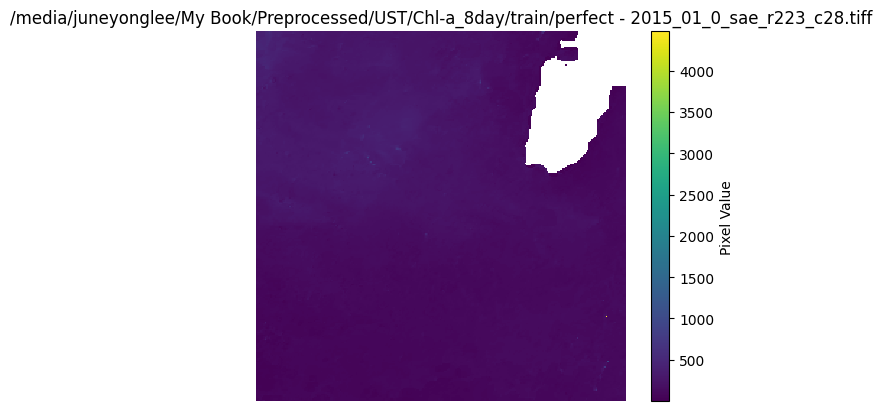

2015_01_1_nak_r1_c21.tiff NaN 값 비율: 17.50%
2015_01_1_nak_r1_c21.tiff 0 값 비율: 0.01%


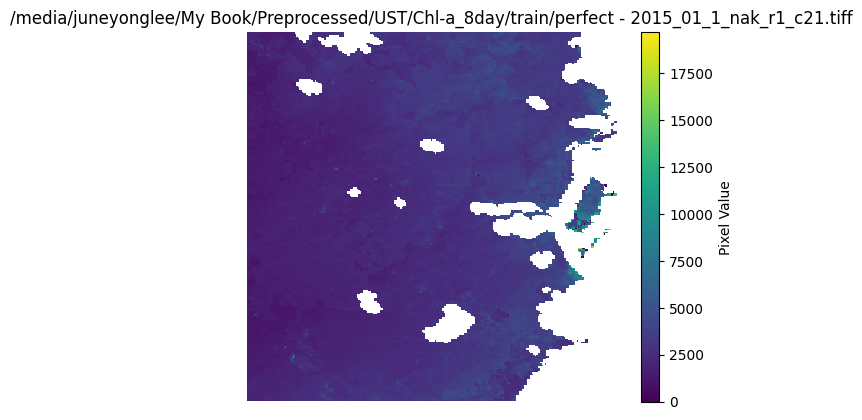

2015_01_1_sae_r142_c40.tiff NaN 값 비율: 11.79%
2015_01_1_sae_r142_c40.tiff 0 값 비율: 0.00%


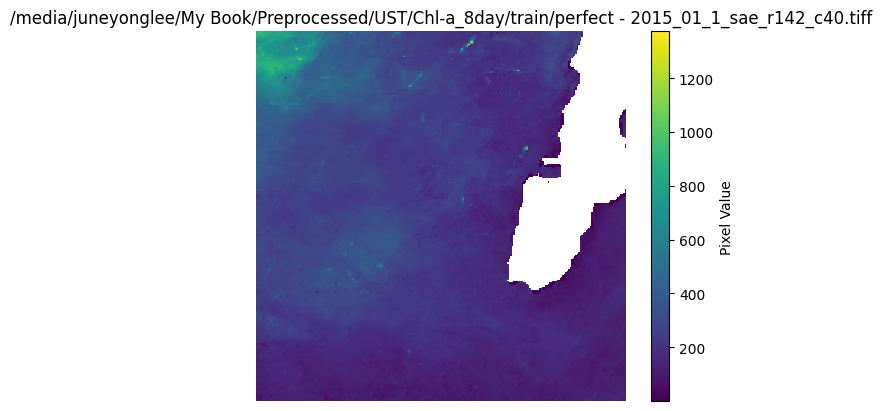

2015_01_2_sae_r131_c123.tiff NaN 값 비율: 14.33%
2015_01_2_sae_r131_c123.tiff 0 값 비율: 0.00%


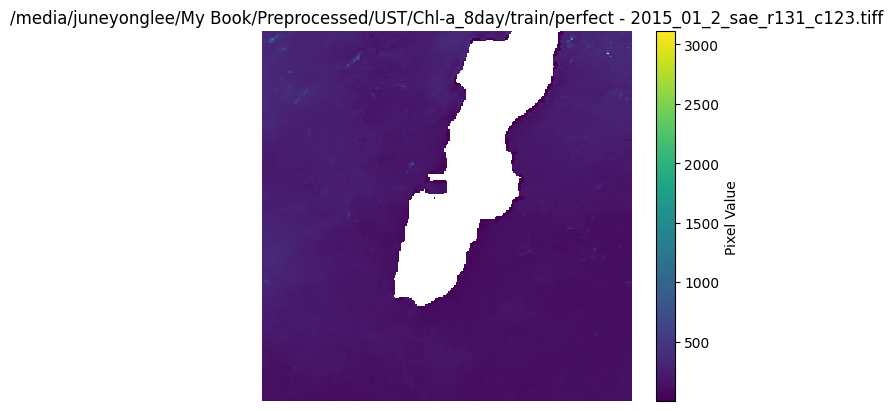

2015_01_3_sae_r49_c226.tiff NaN 값 비율: 13.66%
2015_01_3_sae_r49_c226.tiff 0 값 비율: 0.00%


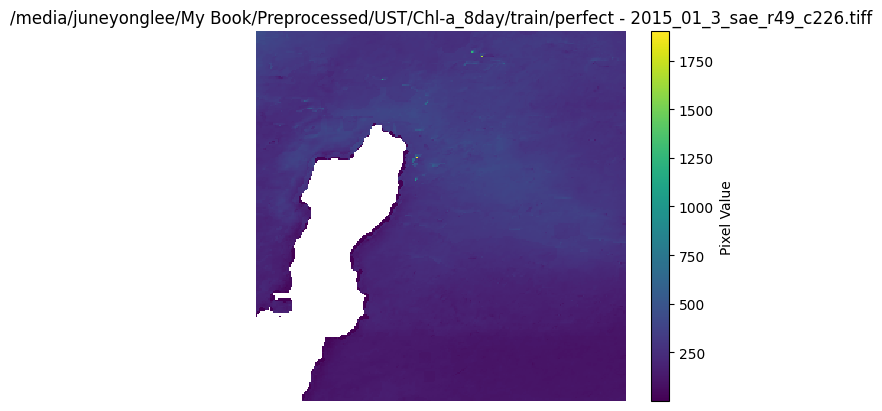

2015_01_4_sae_r231_c206.tiff NaN 값 비율: 9.89%
2015_01_4_sae_r231_c206.tiff 0 값 비율: 0.00%


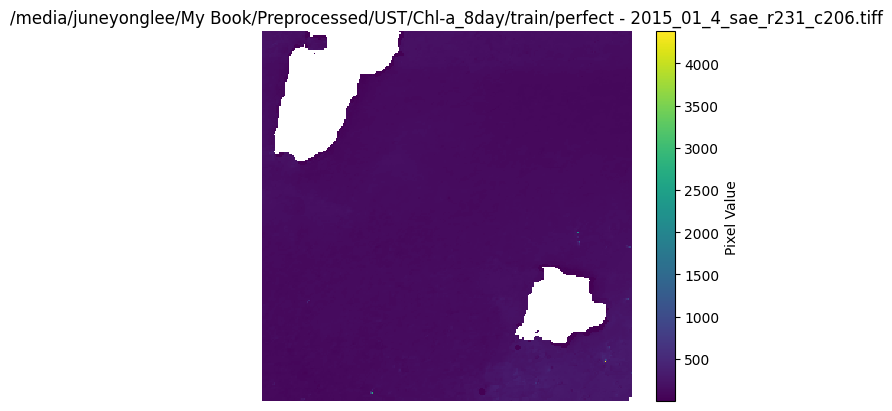

2015_01_5_sae_r28_c132.tiff NaN 값 비율: 12.75%
2015_01_5_sae_r28_c132.tiff 0 값 비율: 0.00%


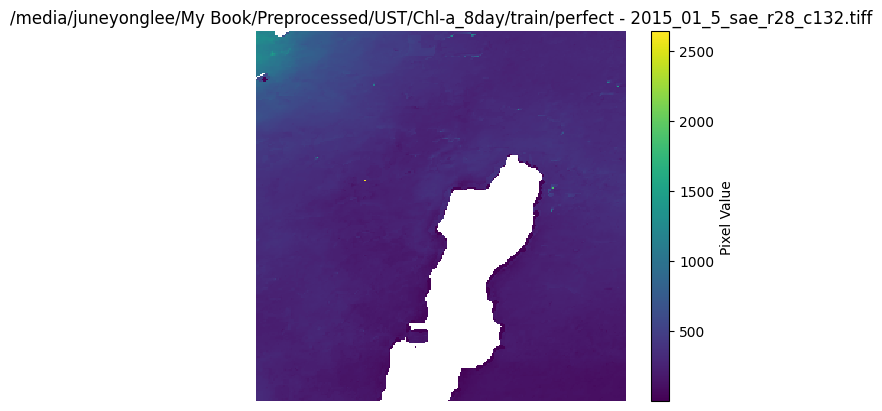

2015_01_6_sae_r136_c54.tiff NaN 값 비율: 13.36%
2015_01_6_sae_r136_c54.tiff 0 값 비율: 0.00%


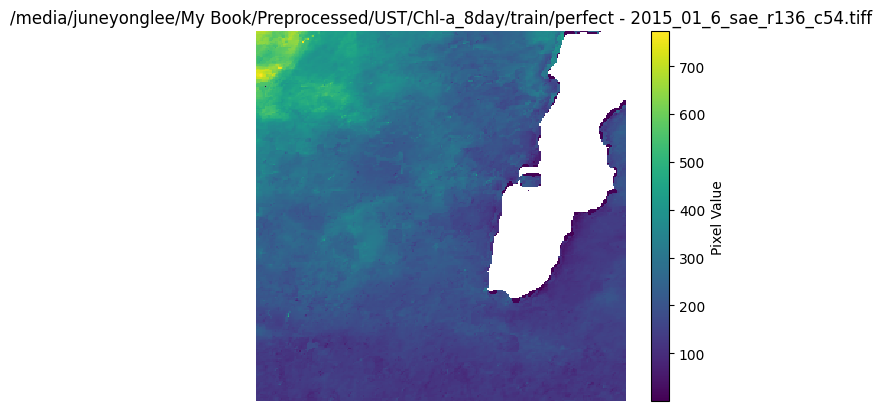

2015_01_7_sae_r25_c53.tiff NaN 값 비율: 12.34%
2015_01_7_sae_r25_c53.tiff 0 값 비율: 0.00%


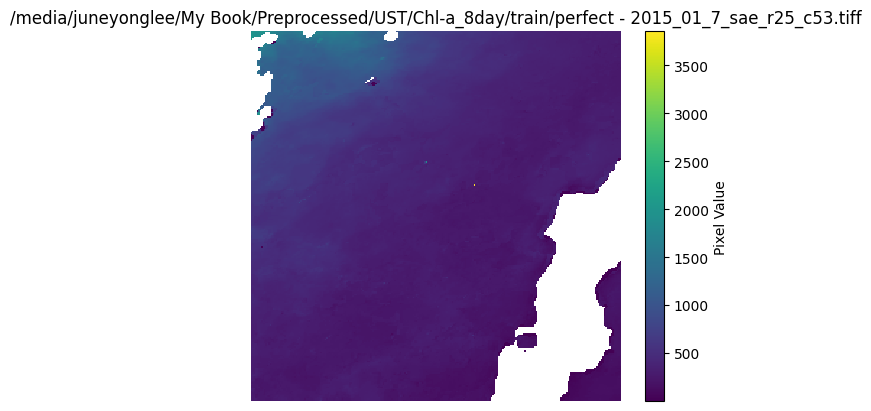

2015_01_8_sae_r78_c203.tiff NaN 값 비율: 15.39%
2015_01_8_sae_r78_c203.tiff 0 값 비율: 0.00%


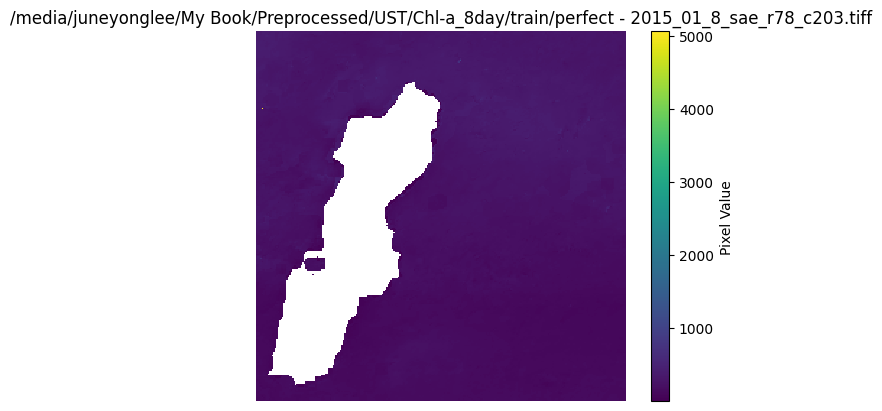

2015_01_9_sae_r209_c84.tiff NaN 값 비율: 8.62%
2015_01_9_sae_r209_c84.tiff 0 값 비율: 0.00%


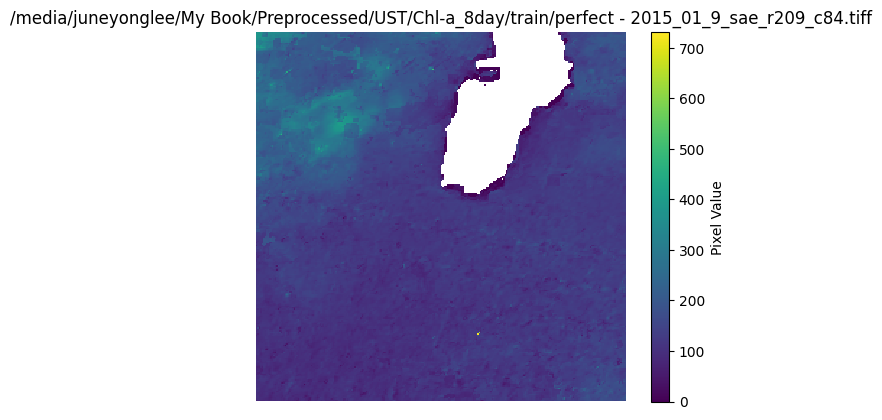

2015_01_10_sae_r223_c115.tiff NaN 값 비율: 7.71%
2015_01_10_sae_r223_c115.tiff 0 값 비율: 0.00%


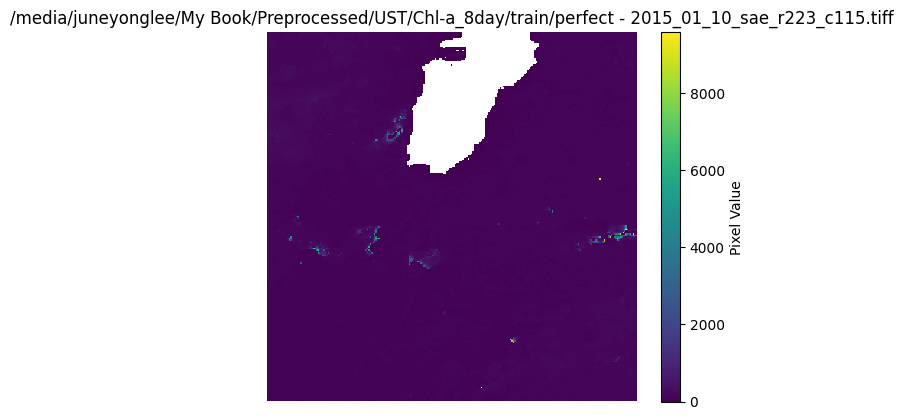

2015_01_11_sae_r197_c63.tiff NaN 값 비율: 9.52%
2015_01_11_sae_r197_c63.tiff 0 값 비율: 0.00%


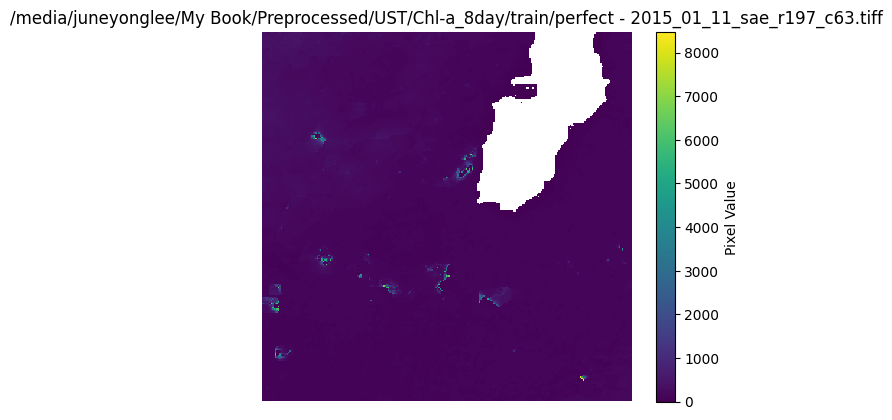

2015_01_12_sae_r247_c24.tiff NaN 값 비율: 5.44%
2015_01_12_sae_r247_c24.tiff 0 값 비율: 0.00%


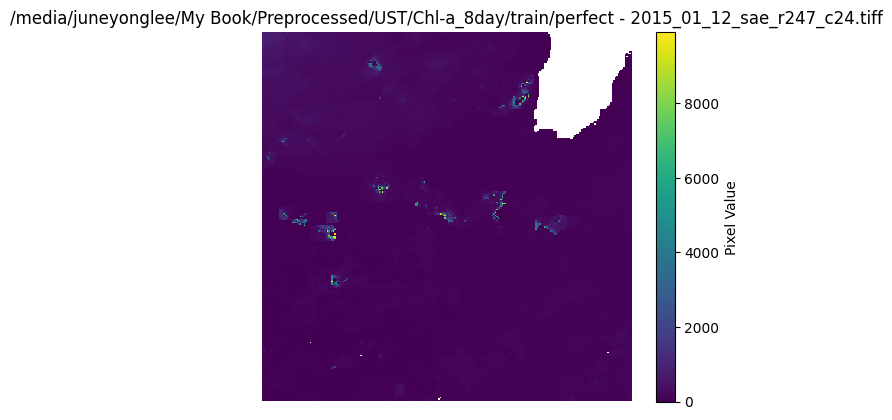

2015_01_13_sae_r129_c243.tiff NaN 값 비율: 12.38%
2015_01_13_sae_r129_c243.tiff 0 값 비율: 0.00%


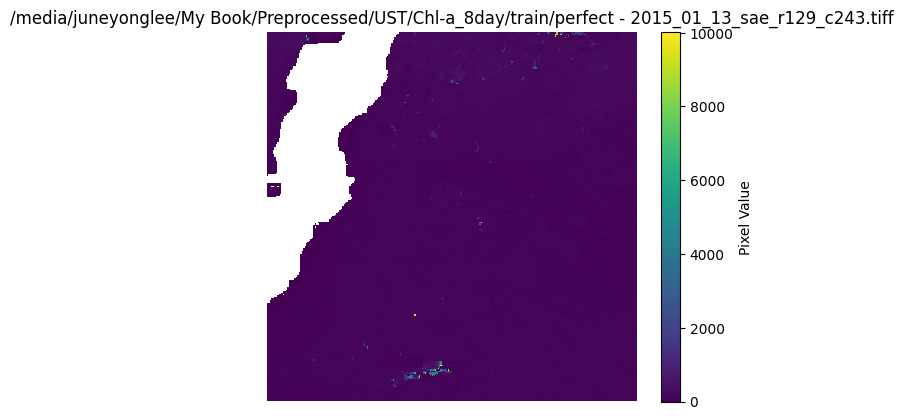

2015_01_14_sae_r251_c198.tiff NaN 값 비율: 8.49%
2015_01_14_sae_r251_c198.tiff 0 값 비율: 0.00%


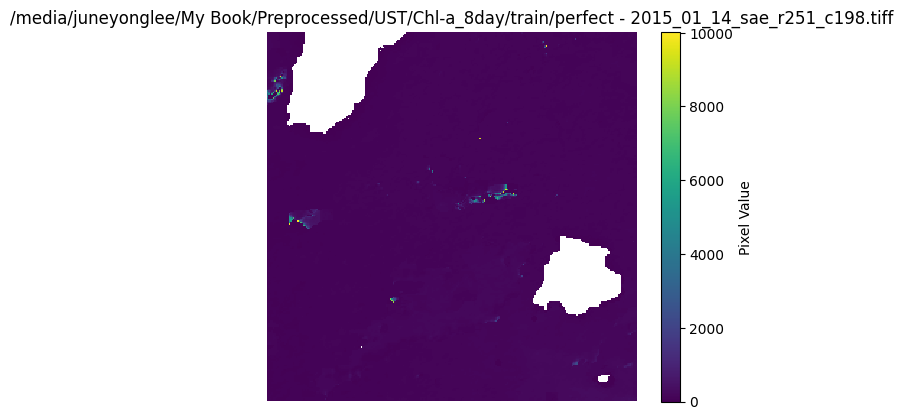

2015_01_15_sae_r67_c208.tiff NaN 값 비율: 15.18%
2015_01_15_sae_r67_c208.tiff 0 값 비율: 0.00%


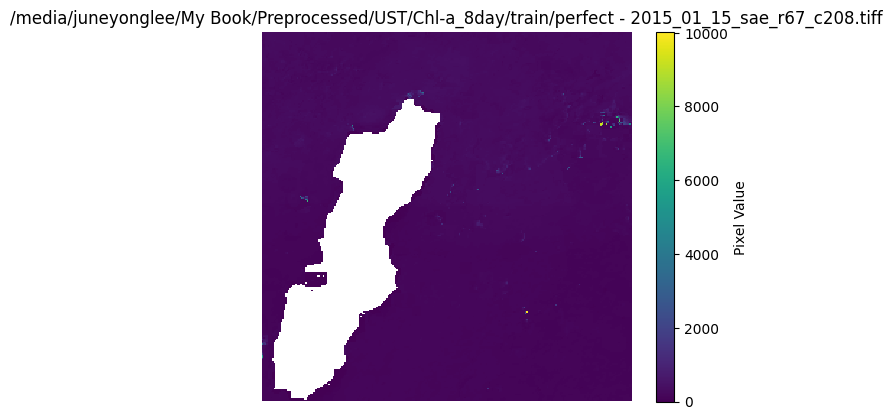

2015_01_16_sae_r254_c248.tiff NaN 값 비율: 5.74%
2015_01_16_sae_r254_c248.tiff 0 값 비율: 0.00%


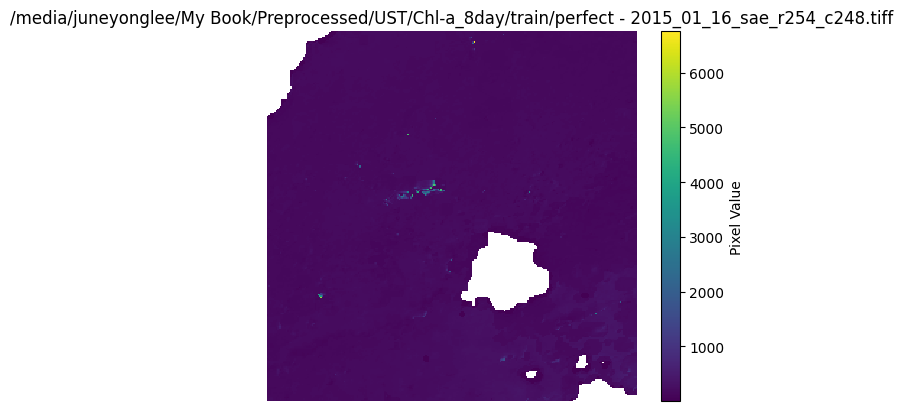

2015_01_17_nak_r78_c16.tiff NaN 값 비율: 30.08%
2015_01_17_nak_r78_c16.tiff 0 값 비율: 0.01%


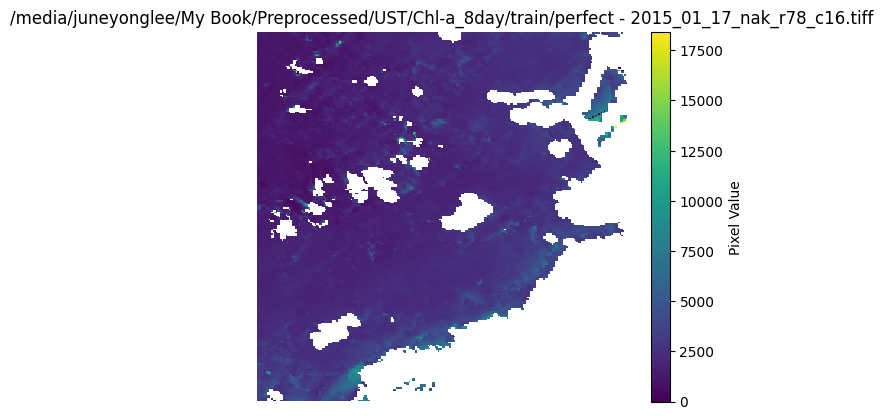

2015_01_17_sae_r139_c69.tiff NaN 값 비율: 14.89%
2015_01_17_sae_r139_c69.tiff 0 값 비율: 0.00%


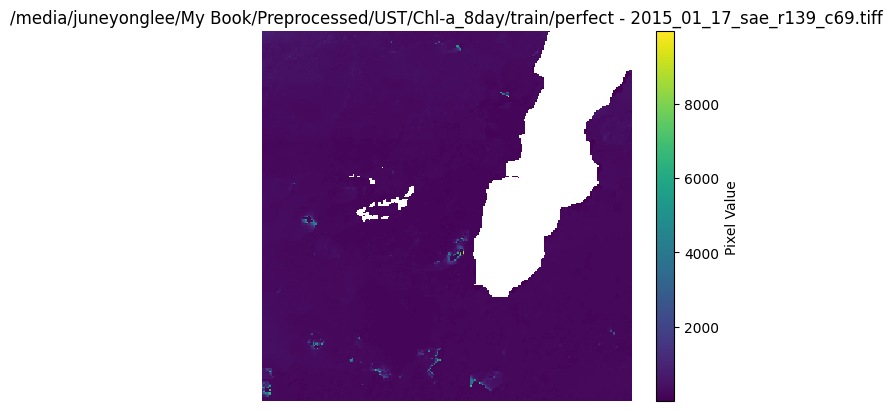

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 최상위 디렉토리 경로 설정
root_directory = "/media/juneyonglee/My Book/Preprocessed/UST/Chl-a_8day/train/perfect"

# 사용자 정의 컬러맵 생성 (해양 데이터용)
def create_custom_cmap():
    viridis = plt.cm.get_cmap('viridis', 256)  # 256개 색상 사용
    return ListedColormap(viridis(np.linspace(0, 1, 256)))

# 사용자 정의 컬러맵 설정
custom_cmap = create_custom_cmap()

# 디렉토리 내의 모든 하위 폴더와 파일을 순차적으로 처리
image_count = 0  # 출력할 이미지 카운터
max_images = 20  # 출력할 최대 이미지 수

for dirpath, dirnames, filenames in os.walk(root_directory):
    print(f"현재 폴더: {dirpath}")  # 현재 폴더 경로 출력
    
    # 해당 폴더 내의 모든 tiff 파일을 처리
    for filename in filenames:
        if filename.endswith(".tiff"):  # TIFF 파일만 선택
            file_path = os.path.join(dirpath, filename)
            
            # 이미지 불러오기
            img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

            # 육지 부분(999)을 NaN으로 변환하여 계산에 제외
            img_ocean = np.copy(img)
            img_ocean[img_ocean == 999] = np.nan  # 육지 부분을 NaN으로 변환

            # NaN 값 비율 계산
            nan_count = np.count_nonzero(np.isnan(img_ocean))
            total_pixels = img_ocean.shape[0] * img_ocean.shape[1]
            nan_ratio = (nan_count / total_pixels) * 100

            # 0 값 비율 계산
            zero_count = np.count_nonzero(img_ocean == 0)
            zero_ratio = (zero_count / total_pixels) * 100
            
            print(f"{filename} NaN 값 비율: {nan_ratio:.2f}%")
            print(f"{filename} 0 값 비율: {zero_ratio:.2f}%")
            
            # 해양 데이터 시각화 (육지 부분은 NaN으로 표시되지 않음)
            plt.imshow(img_ocean, cmap=custom_cmap, interpolation='none')
            plt.axis('off')  # 축 제거
            plt.colorbar(label='Pixel Value')  # 컬러맵 바 추가
            plt.title(f"{dirpath} - {filename}")  # 폴더 경로와 파일명 출력
            
            # 육지(999) 부분을 빨간색으로 오버레이
            land_mask = (img == 999)
            # plt.imshow(land_mask, cmap=ListedColormap(['red']), interpolation='none', alpha=0.6)
            
            plt.show()  # 각 이미지별로 별도 창으로 보여줌

            image_count += 1  # 이미지 카운터 증가
            if image_count >= max_images:  # 최대 이미지 수에 도달하면 종료
                break
    if image_count >= max_images:  # 상위 루프에서도 종료
        break
